In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
# read and load the csv file created
subjects2 = pd.read_csv("activities with common attributes.csv")
subjects2

,Unnamed: 0,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),...,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,...,1,1,0,0,0,1,0,1,1,0
1,1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,...,1,1,0,0,0,1,0,1,1,0
2,2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,...,1,1,0,0,0,1,0,1,1,0
3,3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,...,1,1,0,0,0,1,0,1,1,0
4,4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,...,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,343190,10,-21.9470,3.92360,-6.22580,0.133960,0.163270,-2.4873,-19.2330,3.46140,...,12,0,1,0,1,0,1,0,0,0
343191,343191,10,-21.9140,2.75210,-12.27900,-0.087912,-0.083726,-21.5910,-19.4370,-6.04190,...,12,0,1,0,1,0,1,0,0,0
343192,343192,10,-21.8140,-2.72740,-12.70900,-0.309790,-0.200940,7.5433,-19.2450,-2.66800,...,12,0,1,0,1,0,1,0,0,0
343193,343193,10,-21.7900,-3.92290,-7.27940,-0.443750,-0.259550,3.0142,-19.3340,-7.70740,...,12,0,1,0,1,0,1,0,0,0


In [5]:
subjects2.drop(columns=['Unnamed: 0'], inplace = True)

In [6]:
subjects2.drop(columns=['electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'], inplace = True)

In [7]:
subjects2.columns

Index(['subject_number', 'acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'g

In [8]:
subjects2.head()

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),...,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,...,1,1,0,0,0,1,0,1,1,0
1,1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,...,1,1,0,0,0,1,0,1,1,0
2,1,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,...,1,1,0,0,0,1,0,1,1,0
3,1,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,...,1,1,0,0,0,1,0,1,1,0
4,1,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,...,1,1,0,0,0,1,0,1,1,0


Before neural network part, try a bunch of machine learning models.

In [9]:
# train test split
X_train=subjects2[(subjects2['subject_number']!=10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]




X_test=subjects2[(subjects2['subject_number']==10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]


y_train=subjects2[(subjects2['subject_number']!=10)]['Label (0 for the null class)']
y_test=subjects2[(subjects2['subject_number']==10)]['Label (0 for the null class)']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)


In [10]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test,y_test))

0.9205402196497477


In [7]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_scaled_train, y_train)
print(DT_model.score(X_scaled_train,y_train))
print(DT_model.score(X_scaled_test,y_test))

1.0
0.6016325319085782


In [9]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier(n_estimators=50)
my_random_forest.fit(X_train, y_train)
print(my_random_forest.score(X_test,y_test))

my_random_forest.fit(X_scaled_train, y_train)
print(my_random_forest.score(X_scaled_test,y_test))

0.8250519441970912
0.828673196794301


In [11]:
X_train=subjects2[(subjects2['subject_number']!=10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]




X_test=subjects2[(subjects2['subject_number']==10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]


y_train=subjects2[(subjects2['subject_number']!=10)]['Label (0 for the null class)']
y_test=subjects2[(subjects2['subject_number']==10)]['Label (0 for the null class)']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    

In [12]:
from sklearn.ensemble import BaggingClassifier
ensemble_of_KNN = BaggingClassifier(KNeighborsClassifier(), n_estimators=5);
ensemble_of_KNN.fit(X_scaled_train, y_train)


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=5, n_jobs=None, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [13]:
print(ensemble_of_KNN.score(X_scaled_test,y_test))

0.9206292668447611


In [15]:
from sklearn.metrics import confusion_matrix
y_pred = ensemble_of_KNN.predict(X_scaled_test)
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95      3072
           2       1.00      1.00      1.00      3072
           3       1.00      1.00      1.00      3072
           4       0.98      0.97      0.98      3072
           5       0.92      0.96      0.94      3072
           6       0.59      0.91      0.71      2458
           7       1.00      0.83      0.91      2765
           8       0.93      0.58      0.71      2867
           9       0.98      1.00      0.99      3072
          10       0.94      1.00      0.97      3072
          11       0.98      0.98      0.98      3072
          12       0.97      0.57      0.72      1024

    accuracy                           0.92     33690
   macro avg       0.93      0.90      0.91     33690
weighted avg       0.94      0.92      0.92     33690



In [16]:
confusion_matrix(y_test, y_pred)

array([[3070,    0,    0,    0,    0,    0,    0,    2,    0,    0,    0,
           0],
       [   0, 3072,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0, 3072,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0, 2980,   92,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    6, 2963,   13,    3,   87,    0,    0,    0,
           0],
       [ 221,    0,    0,    0,    0, 2228,    0,    9,    0,    0,    0,
           0],
       [  77,    0,    0,    0,    0,  379, 2291,    0,   18,    0,    0,
           0],
       [   0,    0,    0,    0,    0, 1177,    0, 1660,   30,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    1,    0,    0, 3071,    0,    0,
           0],
       [   0,    0,    0,    1,    0,    0,    0,    1,    0, 3060,    5,
           5],
       [   0,    0,    0,    6,    0,    0,    0,    0,    0,   48, 3004,
          14],
       [   0,    0,  

In [10]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(X_scaled_train, y_train)
print(f"XG Boost score: {XGB_model.score(X_scaled_test, y_test)}")

XG Boost score: 0.8082813891362423


In [11]:
from sklearn.ensemble import GradientBoostingClassifier


GB_model = GradientBoostingClassifier()
GB_model.fit(X_scaled_train, y_train)
print(f"Gradient boost score: {GB_model.score(X_scaled_test, y_test)}")

Gradient boost score: 0.8069456812110418


In [16]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=1), n_estimators=50)
AdaBoost_model.fit(X_scaled_train, y_train)
print(f"Ada boost score: {AdaBoost_model.score(X_scaled_test, y_test)}")

Ada boost score: 0.42229148115167703


In [ ]:
from sklearn.svm import SVC
my_RBF_kernel_SVM = SVC()
my_linear_kernel_SVM = SVC(kernel='linear')
my_linear_kernel_SVM.fit(X_scaled_train, y_train)

print(f" SVC score is: {my_linear_kernel_SVM.score(X_scaled_test,y_test)}")

In [20]:
NN_model = MLPClassifier(solver='lbfgs',alpha = 100)
NN_model.fit(X_scaled_train,y_train);
NN_model.score(X_scaled_test, y_test)

0.8728109231225883

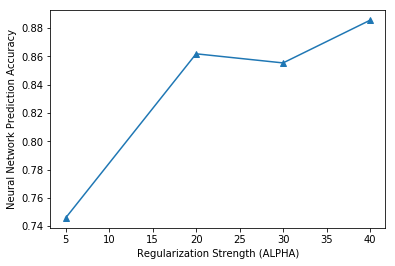

In [14]:
from sklearn.neural_network import MLPClassifier

alphaList=[5,20,30,40]
NN_score=[]
for value in alphaList:  
    NN_model = MLPClassifier(solver='lbfgs',alpha = value)
    NN_model.fit(X_scaled_train,y_train);
    NN_score.append(NN_model.score(X_scaled_test, y_test))
plt.figure()
plt.plot(alphaList, NN_score, marker='^')
plt.xlabel('Regularization Strength (ALPHA)')
plt.ylabel('Neural Network Prediction Accuracy')
plt.show()